In [1]:
# import libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
class CustomDepthwiseConv2D(tf.keras.layers.DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)

def load_keras_model(path):
    return tf.keras.models.load_model(path, custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D})

def load_labels_txt(path):
    return [line.strip().split(' ', 1)[-1] for line in open(path).readlines()]

def predict_image(model, labels, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    pred = model.predict(x)[0]
    label = labels[np.argmax(pred)]
    confidence = np.max(pred) * 100
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"{label} ({confidence:.2f}%)")
    plt.show()

In [3]:
# upload image model + labels
print("upload keras_model.h5 and labels.txt for Image Classification")
image_model_path = list(files.upload().keys())[0]
image_labels_path = list(files.upload().keys())[0]
image_model = load_keras_model(image_model_path)
image_labels = load_labels_txt(image_labels_path)

upload keras_model.h5 and labels.txt for Image Classification


Saving keras_model.h5 to keras_model.h5


Saving labels.txt to labels.txt


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


upload an image file to classify


Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


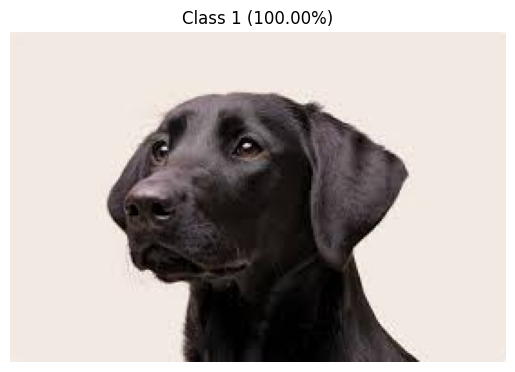

In [4]:
# upload image
print("upload an image file to classify")
img_path = list(files.upload().keys())[0]
predict_image(image_model, image_labels, img_path)